# Vague Linear regression model from scratch
Here we will use Kaggle dataset for mice's weight and height and we will fit a line to it using *least square* statistical method. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the datasets
data=pd.read_csv("/kaggle/input/weight-height/weight-height.csv",sep=",") 

data.head() #Checking if the dataset was well imported


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


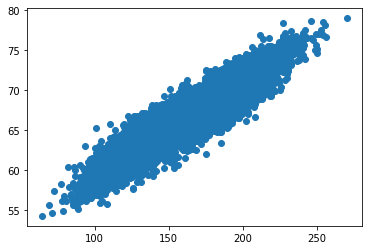

In [36]:
plt.scatter(data["Weight"],data["Height"], ) #Plotting the data

In [37]:
sampled_data= data.sample(100,replace=False) # To sample the data with replacement in order to work only with 100 values

In [38]:
sampled_data.head()

,Gender,Height,Weight
16,Male,72.418317,196.028506
2881,Male,69.163188,200.606238
2509,Male,70.049702,176.589379
9929,Female,59.514678,109.421206
8919,Female,62.116060,146.493036


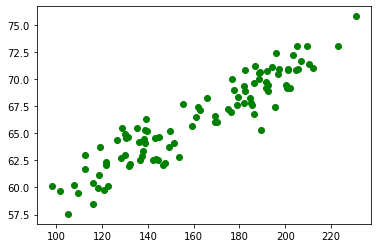

In [39]:
plt.scatter(sampled_data["Weight"], sampled_data["Height"],color="green") #Plot of the selected samples

In [40]:
data.corr(method="pearson").style.background_gradient(cmap="coolwarm") #Correlation matrix that shows the relationship between weight and height is linear

#plt.matshow(corr)

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In order to find the line that fits the best to our data we set a staright line through the data  with $n= mean(Height)$ and we rotate the line. For each data point we compute the distance to the line $(n-hieght)^2$ and we add them. Finally we select the line with the least distance to the real data. This method is known as *least square*

66.33792906814591


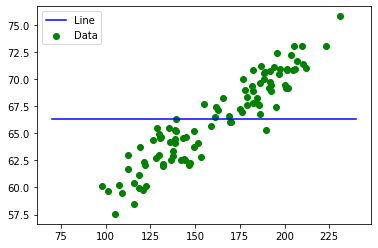

In [41]:
def straight_line(x,m,n): #Returns a line given slope and y intercept
    return m*x+n

X=np.linspace(70,240,240) #Set of values for X 

n=sampled_data["Height"].mean() #We set n equal to the mean of height
print(n)

plt.plot(X,straight_line(X,0,n),color="blue",label="Line")
plt.scatter(sampled_data["Weight"], sampled_data["Height"],label="Data",color="green")
plt.legend()

0.05
57
0.1
49
0.15000000000000002
41
0.2
33
0.25
25
0.3
17
0.35
9
0.39999999999999997
1
0.44999999999999996
-7
0.49999999999999994
-15


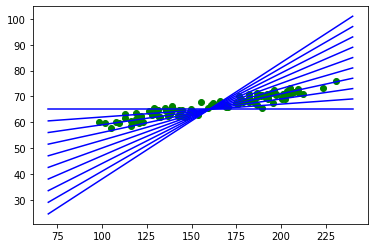

In [42]:
def rotate_line(X, m,n):  #The line is rotated using different m and n 
    m_vals=[]
    n_vals=[]
    for i in range(10):
        plt.plot(X,straight_line(X,m,n,),color="blue")
        m=m+0.050 #m is increased for each new line
        print(m)
        n=n-8     #n is decreased for each new line
        print(n)
        m_vals.append(m)
        n_vals.append(n)
    return m_vals,n_vals 
        
        
    
                 
rotate_line(X,0,65)
plt.scatter(sampled_data["Weight"], sampled_data["Height"],label="Data",color="green")

0.05
58.33792906814591
0.1
50.33792906814591
0.15000000000000002
42.33792906814591
0.2
34.33792906814591
0.25
26.33792906814591
0.3
18.33792906814591
0.35
10.337929068145911
0.39999999999999997
2.337929068145911
0.44999999999999996
-5.662070931854089
0.49999999999999994
-13.662070931854089
m vals [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994]
n vals [58.33792906814591, 50.33792906814591, 42.33792906814591, 34.33792906814591, 26.33792906814591, 18.33792906814591, 10.337929068145911, 2.337929068145911, -5.662070931854089, -13.662070931854089]
*****************************
List of res [18.309517862623323, 0.6319404090481019, 8.307677860137428, 18.441108298054427, 12.577807834018358, 8.091524505903715, 6.2680286638289875, 4.208202225823405, 0.00025125234743808014, 7.656915363510309, 35.21399978577748, 0.8963234975256152, 3.3433068886591935, 36.456416460381746, 5.327450754579911, 0.0255157860310457, 0.1240500335654392, 9

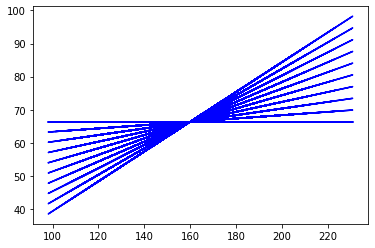

In [43]:
def compute_residual(data_y,data_x,):       #Computes the distance of each line to the real data and selects the lower distance
    Y_line= sampled_data["Height"].mean()
    m_array, n_array=rotate_line(data_x,0,Y_line)    
    print("m vals",m_array)
    print("n vals", n_array)
    print("*****************************")
    list_of_R=[]
    for i in range(10):
        Y_height_line=np.array(straight_line(data_x,m_array[i],n_array[i]))
        Y_height=np.array(data_y)
        list_of_res=[]
        for j in range(100):    
            res= (Y_height_line[j]-Y_height[j])**2
            list_of_res.append(res)
        print("List of res",list_of_res)
        print("with length",len(list_of_res))
        R_val=np.sum(list_of_res)
        list_of_R.append(R_val)
        print("R is",R_val)
        
        
    return list_of_R, np.amin(list_of_R), np.where(np.amin(list_of_R)),m_array, n_array

R_vals, minR, min_R_index,m_vals,n_vals =compute_residual(sampled_data["Height"],sampled_data["Weight"])

print("Lower R",minR, "in",min_R_index )




        
        
    

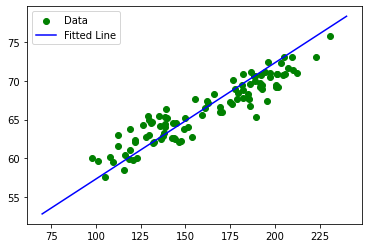

In [44]:
plt.scatter(sampled_data["Weight"], sampled_data["Height"],label="Data", color="green")
plt.plot(X,straight_line(X,m_vals[2],n_vals[2]),color="blue",label="Fitted Line")      #Plots the fitted line
plt.legend()

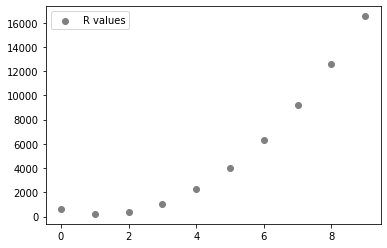

In [45]:
plt.scatter(np.arange(0,10),R_vals, label="R values",color="grey")
plt.legend()

Here we compare our line with one predicted by $LinearRegression()$ from *scikit-learn*

In [46]:
##Comparing with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [47]:
weight_train,weight_test,height_train,height_test=train_test_split(data["Weight"],data["Height"], random_state=0, test_size=.15) #Splits the data into training  and testing data

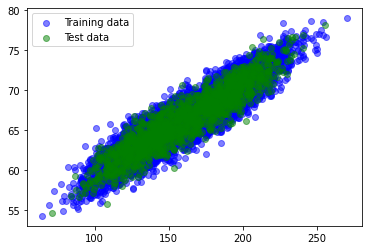

In [48]:
plt.scatter(weight_train,height_train,label="Training data",color="blue",alpha=.5)
plt.scatter(weight_test,height_test,label="Test data",color="green",alpha=.5)
plt.legend()

In [49]:
LinR=LinearRegression() #Creates the model

LinR.fit(weight_train.values.reshape(-1,1) ,height_train.values ) #Feeds the model with the training data

height_predicted=LinR.predict(weight_test.values.reshape(-1,1))   #Fits the line using the trained model

When we pass a one dimensional array of $[n,]$, Scikit-learn is not able to decide that what we have passed is one row of data with multiple columns, or multiple samples of data with single column. i.e. sklearn may not infer whether its $n_samples=n$ and $n_features=1$ or other way around ($n_samples=1$ and $n_features=n$) based on X data alone. Therefore it asks to reshape the 1-D data we provided to a 2-d data of shape $[n_samples, n_features]$ .The 1 in the second place of reshape tells that there is a single column only and -1 is to detect the number of rows automatically for this single column.

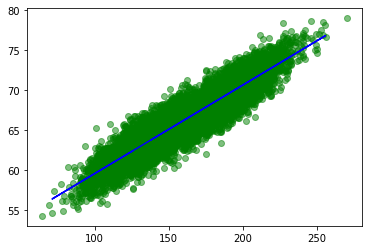

In [50]:
plt.scatter(data["Weight"],data["Height"], label="Real data",color="g", alpha=.5)
plt.plot(weight_test,height_predicted,label="linear regression", color="b")


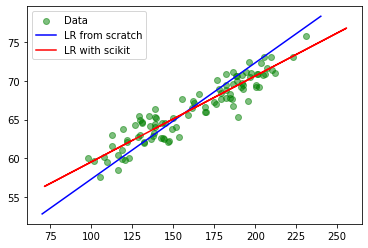

In [51]:
plt.scatter(sampled_data["Weight"], sampled_data["Height"],label="Data", color="green", alpha=.5)
plt.plot(X,straight_line(X,m_vals[2],n_vals[2]),color="blue",label="LR from scratch")
plt.plot(weight_test,height_predicted,label="LR with scikit", color="red")
plt.legend()